<a href="https://colab.research.google.com/github/Mitali2303/Probability-Projects-/blob/main/23110206_Probability_Lab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
players_2 = pd.read_csv('/content/atp_players (1).csv')
print(players_2)

players_1=pd.read_csv('/content/atp_players.csv')
print(players_1.head)

atp_2000=pd.read_excel('/content/atp_2000.xls')
atp_2024=pd.read_excel('/content/atp_2024.xlsx')
print(atp_2024)
atp_2007=pd.read_excel('/content/atp_2007.xls')
atp_2008=pd.read_excel('/content/atp_2008.xls')
atp_2009=pd.read_excel('/content/atp_2009.xls')
atp_20010=pd.read_excel('/content/atp_2010.xls')


      player_id first_name first_initial   last_name     full_name  \
0          a002    Ricardo             R       Acuna       Acuna R   
1          a001      Sadiq             S   Abdullahi   Abdullahi S   
2          a005     Nelson             N       Aerts       Aerts N   
3          a004       Egan             E       Adams       Adams E   
4          a006     Ronald             R      Agenor      Agenor R   
...         ...        ...           ...         ...           ...   
10907      z435         A.             A       Zorab       Zorab A   
10908      z437         J.             J  Zimmermann  Zimmermann J   
10909      z436         G.             G        Zinn        Zinn G   
10910      z440         C.             C      Zenger      Zenger C   
10911      z442         A.             A       Ziffo       Ziffo A   

                                              player_url flag_code  \
0      http://www.atpworldtour.com/en/players/ricardo...       CHI   
1      http://www.a

Q1. Study the joint pmf relation the height in cm and weight in kg of individuals

In [ ]:
import numpy as np

def mat_joint_pmf(x, y, x_size, y_size):
    mat = np.zeros((x_size, y_size))
    for i in range(x_size):
        for j in range(y_size):
            mat[i,j] = x[i] * y[j]
    total = np.nansum(mat)  # Use np.nansum to handle NaN values
    if total == 0:
        return np.zeros_like(mat)
    return mat / total

# creating the joint PMF table (Just for visualising the table)
def joint_pmf_table(joint_pmf, x_values, y_values):
    print("    ", end="")
    for y in y_values:
        print(f"{y:>10}", end="")
    print()
    for i, row in enumerate(joint_pmf):
        print(f"{x_values[i]:<4}", end="")
        for prob in row:
            print(f"{prob:>10.4f}", end="")
        print()

# checking if the joint pmf is independent or not
def is_independent(x_values, y_values, joint_pmf):
    x_size, y_size = joint_pmf.shape
    for i in range(x_size):
        for j in range(y_size):
            if abs(joint_pmf[i, j] - (x_values[i] * y_values[j]))!=0:
                return False
    return True


column_name1 = 'weight_kg'
column_name2 = 'height_cm'
df = players_2
column_values1= df[column_name1]
column_values2= df[column_name2]
weight = column_values1.tolist()
height = column_values2.tolist()

x_values=[]
y_values=[]
for i in range(20):
  if weight[i]=='NaN' or height[i]=='Nan':
    continue
  else:
    x_values.append(weight[i])
    y_values.append(height[i])


len_x=len(x_values)
len_y=len(y_values)


Jp=mat_joint_pmf(x_values,y_values,len_x,len_y)
joint_pmf_table(Jp, x_values, y_values)


         175.0       0.0     188.0     178.0     180.0     183.0       0.0       0.0       0.0     191.0     180.0     178.0       0.0     191.0     185.0     193.0       0.0     185.0     188.0     185.0
68.0    0.0043    0.0000    0.0046    0.0044    0.0044    0.0045    0.0000    0.0000    0.0000    0.0047    0.0044    0.0044    0.0000    0.0047    0.0045    0.0047    0.0000    0.0045    0.0046    0.0045
0.0     0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000    0.0000
75.0    0.0047    0.0000    0.0051    0.0048    0.0049    0.0049    0.0000    0.0000    0.0000    0.0052    0.0049    0.0048    0.0000    0.0052    0.0050    0.0052    0.0000    0.0050    0.0051    0.0050
73.0    0.0046    0.0000    0.0049    0.0047    0.0047    0.0048    0.0000    0.0000    0.0000    0.0050    0.0047    0.0047    0.0000    0.0050    0.0049    0.0051    0.0000    0.

Q2. Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.

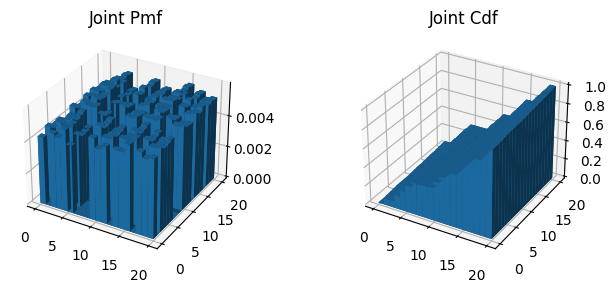

In [ ]:
# 3D Discrete Plot for plotting PMFs
# set up the figure and axes
fig = plt.figure(figsize=(8, 3))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')


x, y = np.meshgrid(range(Jp.shape[0]), range(Jp.shape[1]), indexing='ij')
xx, yy = x.ravel(), y.ravel()

top = Jp
bottom = np.zeros_like(top)
width = depth = 1

#ax.bar3d(x.ravel(), y.ravel(), np.zeros_like(pmf).ravel(), 1, 1, pmf.ravel(), shade=True)
ax1.bar3d(xx, yy, bottom.ravel(), width, depth, top.ravel(), shade=True)
ax1.set_title('Joint Pmf')

top_c=np.cumsum(top)
ax2.bar3d(xx, yy, bottom.ravel(), width, depth,top_c.ravel() , shade=True)
ax2.set_title('Joint Cdf')

plt.show()


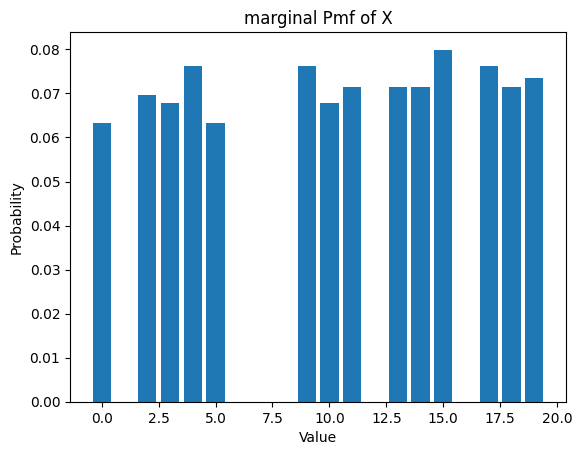

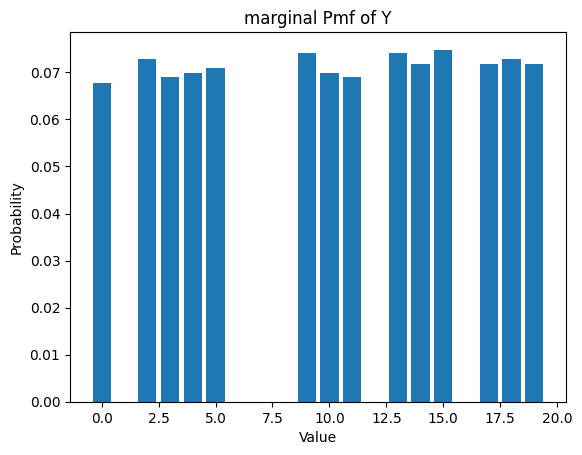

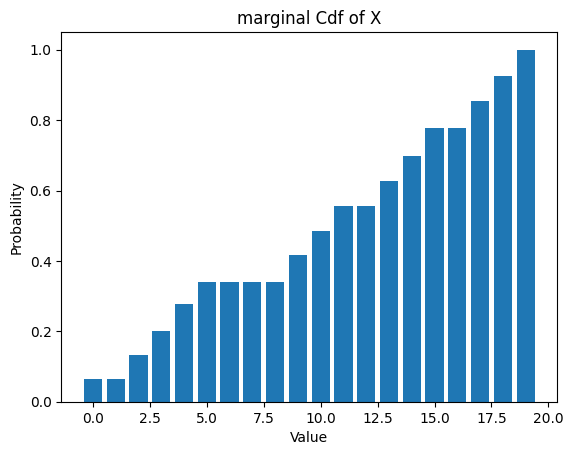

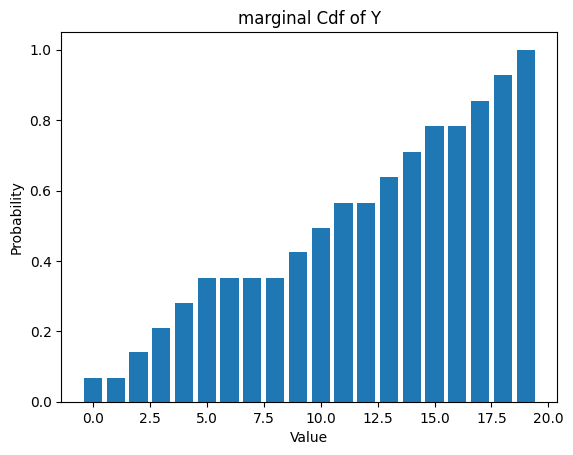

In [ ]:
p_x=[0]*len_x
p_y=[0]*len_y
for i in range(len_x):
  for j in range(len_y):
    p_x[i]+=Jp[i,j]

for i in range(len_y):
  for j in range(len_x):
    p_y[i]+=Jp[j,i]

#Marginal pmf plotting
plt.bar(np.arange(len_x),p_x)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Pmf of X')
plt.show()

plt.bar(np.arange(len_x),p_y)
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Pmf of Y')
plt.show()

plt.bar(np.arange(len_x),np.cumsum(p_x))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Cdf of X')
plt.show()

plt.bar(np.arange(len_y),np.cumsum(p_y))
plt.xlabel('Value')
plt.ylabel('Probability')
plt.title('marginal Cdf of Y')
plt.show()

Q3. Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].


In [ ]:
pmf1 = np.sum(Jp, axis=0)
pmf2 = np.sum(Jp, axis=1)
# Calculate E[XY]
EXY = 0
for i in range(len(x_values)):
  for j in range(len(y_values)):
    EXY += p_x[i] * p_x[j] * Jp[i][j]

# Calculate E[X] and E[Y]
EX = 0
EY = 0
for i in range(len(x_values)):
  for j in range(len(y_values)):
    EX += p_x[i] *Jp[i][j]
    EY += p_y[j] * Jp[i][j]

X1_values = [x - EX for x in p_x]
Y1_values = [y - EY for y in pmf2]

# Calculating E[X1Y1]
EX1Y1=0
for i in range(len(X1_values)):
  for j in range(len(Y1_values)):
    EX1Y1 += X1_values[i] * Y1_values[j] * Jp[i][j]

# Printing the results
print("E[XY]:", EXY)
print("E[X1Y1]:", EX1Y1)

E[XY]: 0.005129938930510812
E[X1Y1]: 5.624828165360588e-22


Q4. Find correlation matrix of four components weight_kg, weight_lbs, height_inches and height_cm .

In [ ]:
def correlation(x, y):
    n = len(x)

    # Calculate means
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Calculate numerator and denominators
    numerator = np.sum((x - mean_x) * (y - mean_y))
    denominator_x = np.sqrt(np.sum((x - mean_x)**2))
    denominator_y = np.sqrt(np.sum((y - mean_y)**2))

    # Calculate correlation coefficient
    correlation_coefficient = numerator / (denominator_x * denominator_y)

    return correlation_coefficient

In [ ]:
att1 = players_2['weight_kg'].values
att2 = players_2['weight_lbs'].values
att3 = players_2['height_inches'].values
att4 = players_2['height_cm'].values

a,b,c,d=[],[],[],[]
for i in range(len(att1)):
  if np.isnan(att1[i]) :
    continue
  if np.isnan(att2[i]) :
    continue
  if np.isnan(att3[i]) :
    continue
  if np.isnan(att4[i]) :
    continue
  else:
    a.append(att1[i])
    b.append(att2[i])
    c.append(att3[i])
    d.append(att4[i])

arr=[a,b,c,d]
V=[]
for i in range(4):
  W=[]
  for j in range(4):
    W.append(correlation(arr[i],arr[j]))
  V.append(W)


# Define the data as a dictionary
da= {
    'weight_kg': V[0],
    'weight_lbs': V[1],
    'height_inches': V[2],
    'height_cm': V[3]
}
data= {
    'weight_kg': a,
    'weight_lbs': b,
    'height_inches': c,
    'height_cm': d
}



data1=pd.DataFrame(data)
# Create a DataFrame
correlation_df = pd.DataFrame(da, index=['weight_kg', 'weight_lbs', 'height_inches', 'height_cm'])

# Print the DataFrame
print(correlation_df)

               weight_kg  weight_lbs  height_inches  height_cm
weight_kg       1.000000    0.999933       0.763421   0.763534
weight_lbs      0.999933    1.000000       0.763301   0.763412
height_inches   0.763421    0.763301       1.000000   0.999971
height_cm       0.763534    0.763412       0.999971   1.000000


Q.5 Estimate the four principal components of the playerss_2 data and Perform dimensionality reduction using PCA to reduce data points into two dimensions and three dimensions.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(correlation_df)

for i in range(len(eigenvalues)):
  for j in range(i, len(eigenvalues)-1):
    if eigenvalues[j]<eigenvalues[j+1] :
      eigenvalues[j], eigenvalues[j+1]=eigenvalues[j+1],eigenvalues[j]
      eigenvectors[j], eigenvectors[j+1]=eigenvectors[j+1],eigenvectors[j]

for i in range(4):
  print('PCA',i+1,':',eigenvectors[i])

PCA 1 : [ 0.50001409  0.49987485 -0.70703906 -0.01438092]
PCA 2 : [0.49997968 0.50013136 0.70688589 0.01418728]
PCA 3 : [ 0.49998718 -0.50011565  0.01438548 -0.70688769]
PCA 4 : [ 0.50001905 -0.49987809 -0.01418276  0.70703727]


In [ ]:
X=eigenvectors.T
recast_data_2d=data1.dot(X[:,:2])
recast_data_3d=data1.dot(X[:,:3])

print('2D :')
print(recast_data_2d)
print()
print('3D :')
print(recast_data_3d)

2D :
              0           1
0     57.679828  160.276221
1      0.000000    0.000000
2     64.955902  174.996914
3     64.428465  168.526881
4     78.190288  183.764586
...         ...         ...
2633  79.481088  195.469259
2634  75.190760  180.764101
2635  82.966709  195.984925
2636  75.190760  180.764101
2637  62.706556  171.246981

[2638 rows x 2 columns]

3D :
              0           1           2
0     57.679828  160.276221 -163.730967
1      0.000000    0.000000    0.000000
2     64.955902  174.996914 -176.850404
3     64.428465  168.526881 -168.338465
4     78.190288  183.764586 -175.240283
...         ...         ...         ...
2633  79.481088  195.469259 -190.364656
2634  75.190760  180.764101 -174.239795
2635  82.966709  195.984925 -187.859348
2636  75.190760  180.764101 -174.239795
2637  62.706556  171.246981 -173.743638

[2638 rows x 3 columns]


Q6. Visualize the above data reduction

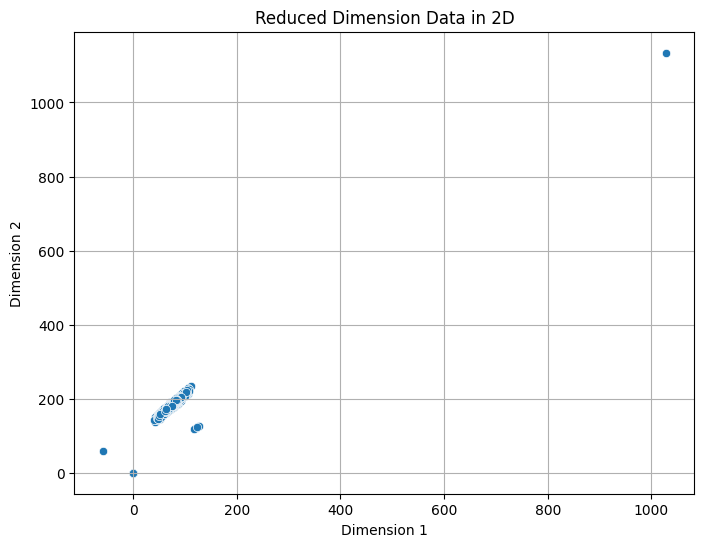

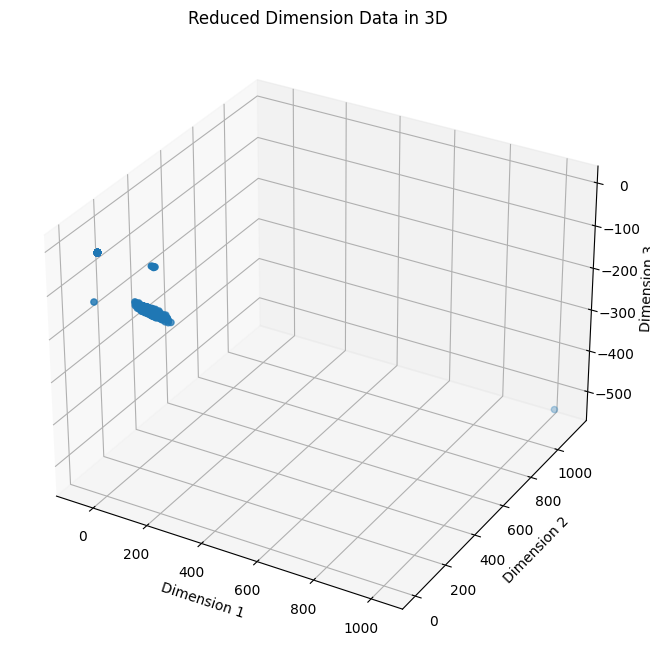

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Visualizing reduced dimension data points in 2D
plt.figure(figsize=(8, 6))
sns.scatterplot(x=recast_data_2d.iloc[:, 0], y=recast_data_2d.iloc[:, 1])
plt.title('Reduced Dimension Data in 2D')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()

# Visualizing reduced dimension data points in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(recast_data_3d.iloc[:, 0], recast_data_3d.iloc[:, 1], recast_data_3d.iloc[:, 2])

# Set labels and title
ax.set_xlabel('Dimension 1')
ax.set_ylabel('Dimension 2')
ax.set_zlabel('Dimension 3')
ax.set_title('Reduced Dimension Data in 3D')

# Show plot
plt.show()


Q7. In data of atp_2000 make the graph people with starting letters vs the percentage of that people winning and losing  

2963
2963


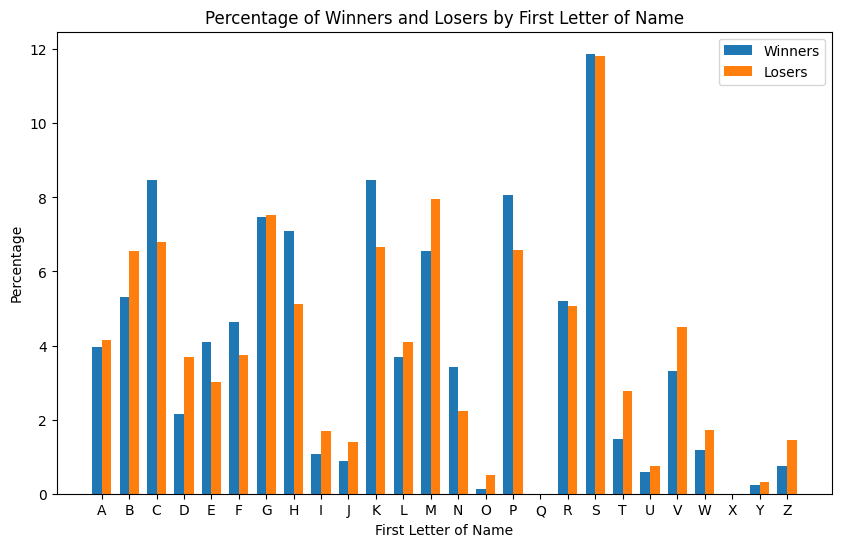

In [ ]:
W =atp_2000['Winner'].values
L =atp_2000['Loser'].values
C=[0]*26
D=[0]*26
print(len(W))
print(len(L))
for i in range(len(W)):
        C[(ord(W[i][0].upper()))- 65] += 1
        D[(ord(L[i][0].upper()))- 65] += 1


# Calculate total counts
total_c = sum(C)
total_d = sum(D)

# Calculate percentages
percentage_c = [count / total_c * 100 for count in C]
percentage_d = [count / total_d * 100 for count in D]

# Plot the bar graph
labels = [chr(i + 65) for i in range(26)]  # Labeling the bars with alphabets from A to Z
x = np.arange(len(labels))  # the label locations

fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35  # the width of the bars
ax.bar(x - width/2, percentage_c, width, label='Winners')
ax.bar(x + width/2, percentage_d, width, label='Losers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('First Letter of Name')
ax.set_ylabel('Percentage')
ax.set_title('Percentage of Winners and Losers by First Letter of Name')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Q8. From the data atp_2024 find the difference between loser points and winner points in the match held in different countries in that data.

                       WPts         LPts
Location                                
Acapulco        2091.064516  1419.741935
Adelaide        1165.185185  1000.074074
Auckland         975.370370   945.555556
Brisbane        1472.290323  1019.387097
Buenos Aires    1571.296296  1231.555556
Cordoba          678.037037   739.370370
Dallas          1200.888889   730.592593
Delray Beach    1367.222222   878.333333
Doha            1214.074074  1078.962963
Dubai           2560.870968  1488.612903
Estoril         1284.777778   753.185185
Hong Kong       1488.148148   938.962963
Houston         1130.185185   728.185185
Indian Wells    2829.810526  1473.789474
Los Cabos       1553.703704  1146.740741
Marrakech        702.148148   702.962963
Marseille       1584.962963  1030.037037
Melbourne       2933.866142  1262.349206
Miami           2448.757895  1396.736842
Montpellier     1080.962963   745.074074
Rio de Janeiro   962.774194  1071.677419
Rotterdam       3009.645161  1423.548387
Santiago        

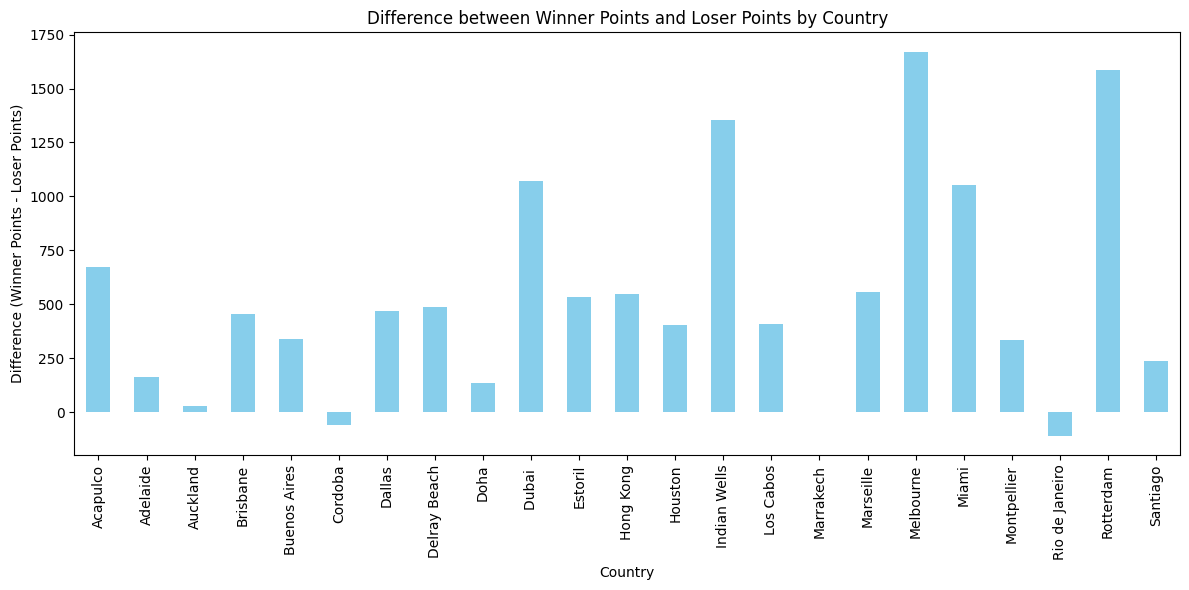

In [ ]:

# Group winner points (wpts) and loser points (lpts) by country names (location)
grouped_points = atp_2024.groupby('Location').agg({'WPts': 'mean', 'LPts': 'mean'})
print(grouped_points)
# Calculate the difference between winner points and loser points
grouped_points['difference'] = grouped_points['WPts'] - grouped_points['LPts']

# Plotting the bar graph
plt.figure(figsize=(12, 6))
grouped_points['difference'].plot(kind='bar', color='skyblue')
plt.title('Difference between Winner Points and Loser Points by Country')
plt.xlabel('Country')
plt.ylabel('Difference (Winner Points - Loser Points)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Q9.  How does the choice of court surfaces for ATP tournaments vary throughout the year from 2007 to 2009, and are there any discernible seasonal trends or preferences among tournament organizers?

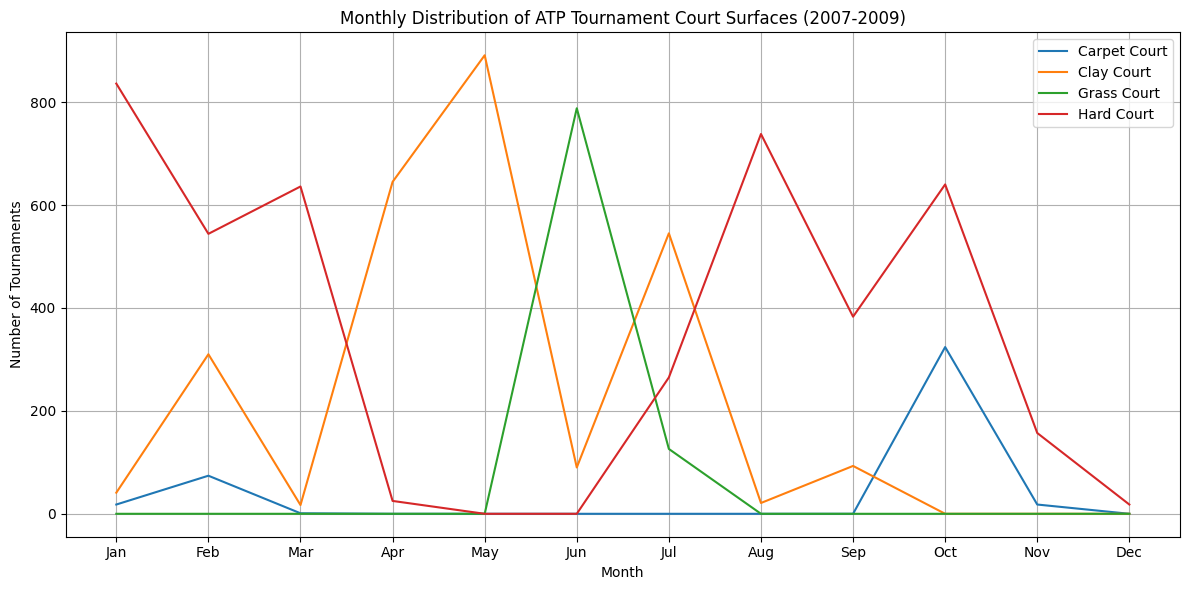

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

years = range(2007, 2010)
dfs = []
for year in years:
    file_path = f"atp_{year}.xls"
    df = pd.read_excel(file_path)
    dfs.append(df)
data = pd.concat(dfs, ignore_index=True)
data['Date'] = pd.to_datetime(data['Date'], format='%m-%d-%Y')
data['Month'] = data['Date'].dt.month

court_surface_categories = {
    'Hard': 'Hard Court',
    'Clay': 'Clay Court',
    'Grass': 'Grass Court',
    'Carpet': 'Carpet Court'
}

data['Court Surface'] = data['Surface'].map(court_surface_categories)
monthly_surface_counts = data.groupby(['Month', 'Court Surface']).size().unstack().fillna(0)


plt.figure(figsize=(12, 6))
for surface in monthly_surface_counts.columns:
    plt.plot(monthly_surface_counts.index, monthly_surface_counts[surface], label=surface)
plt.title('Monthly Distribution of ATP Tournament Court Surfaces (2007-2009)')
plt.xlabel('Month')
plt.ylabel('Number of Tournaments')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q10. With use of pie chart show distribution of matches across different court surfaces from 2002 to 2005

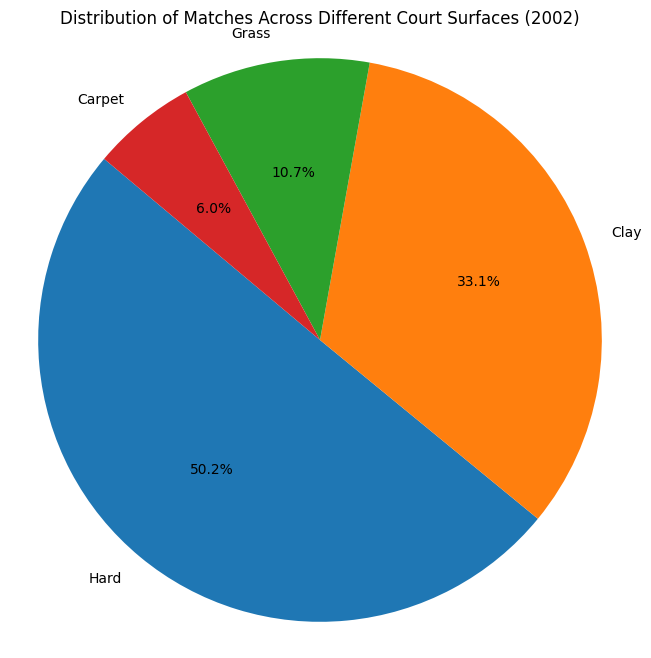

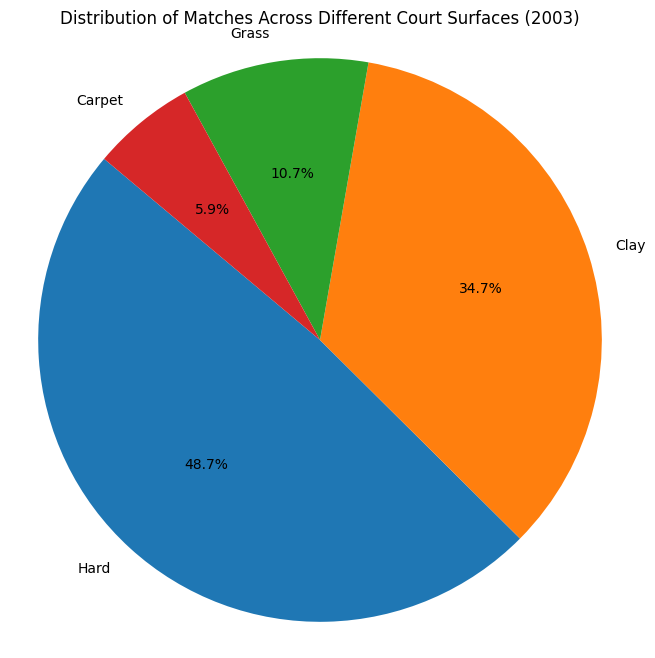

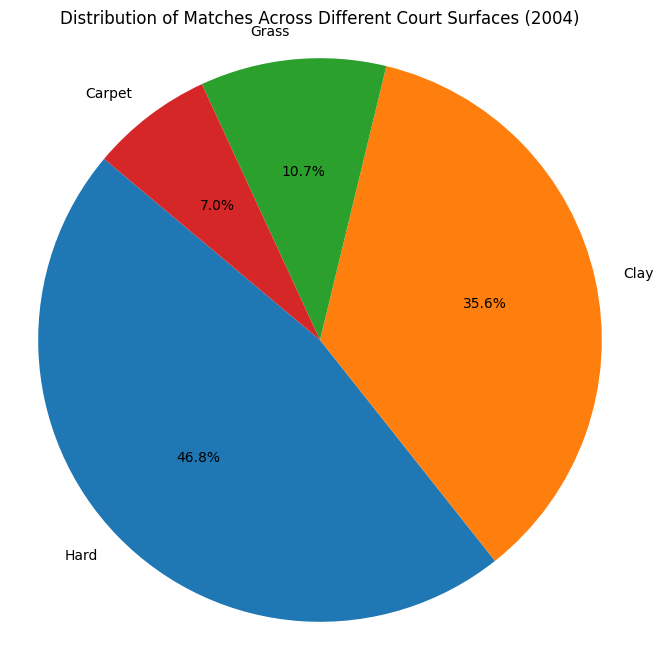

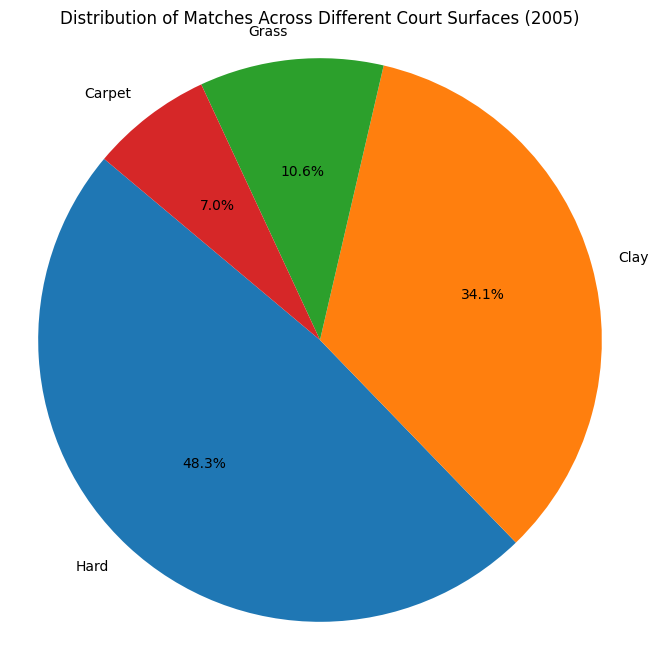

In [ ]:
# Iterate over the years from 2002 to 2005
for year in range(2002, 2006):
    file_path = f"atp_{year}.xls"
    data = pd.read_excel(file_path)
    data = data.dropna(subset=['Wsets', 'Lsets'])
    court_surface_counts = data['Surface'].value_counts()
    plt.figure(figsize=(8, 8))
    plt.pie(court_surface_counts, labels=court_surface_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Matches Across Different Court Surfaces ({year})')
    plt.axis('equal')
    plt.show()

#from analysis we can see that distribution remains approx same for these years